# Import Libraries

In [49]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [50]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [51]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [52]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [53]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [55]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

Text(0.5, 1.0, 'FUELCONSUMPTION_CITY')

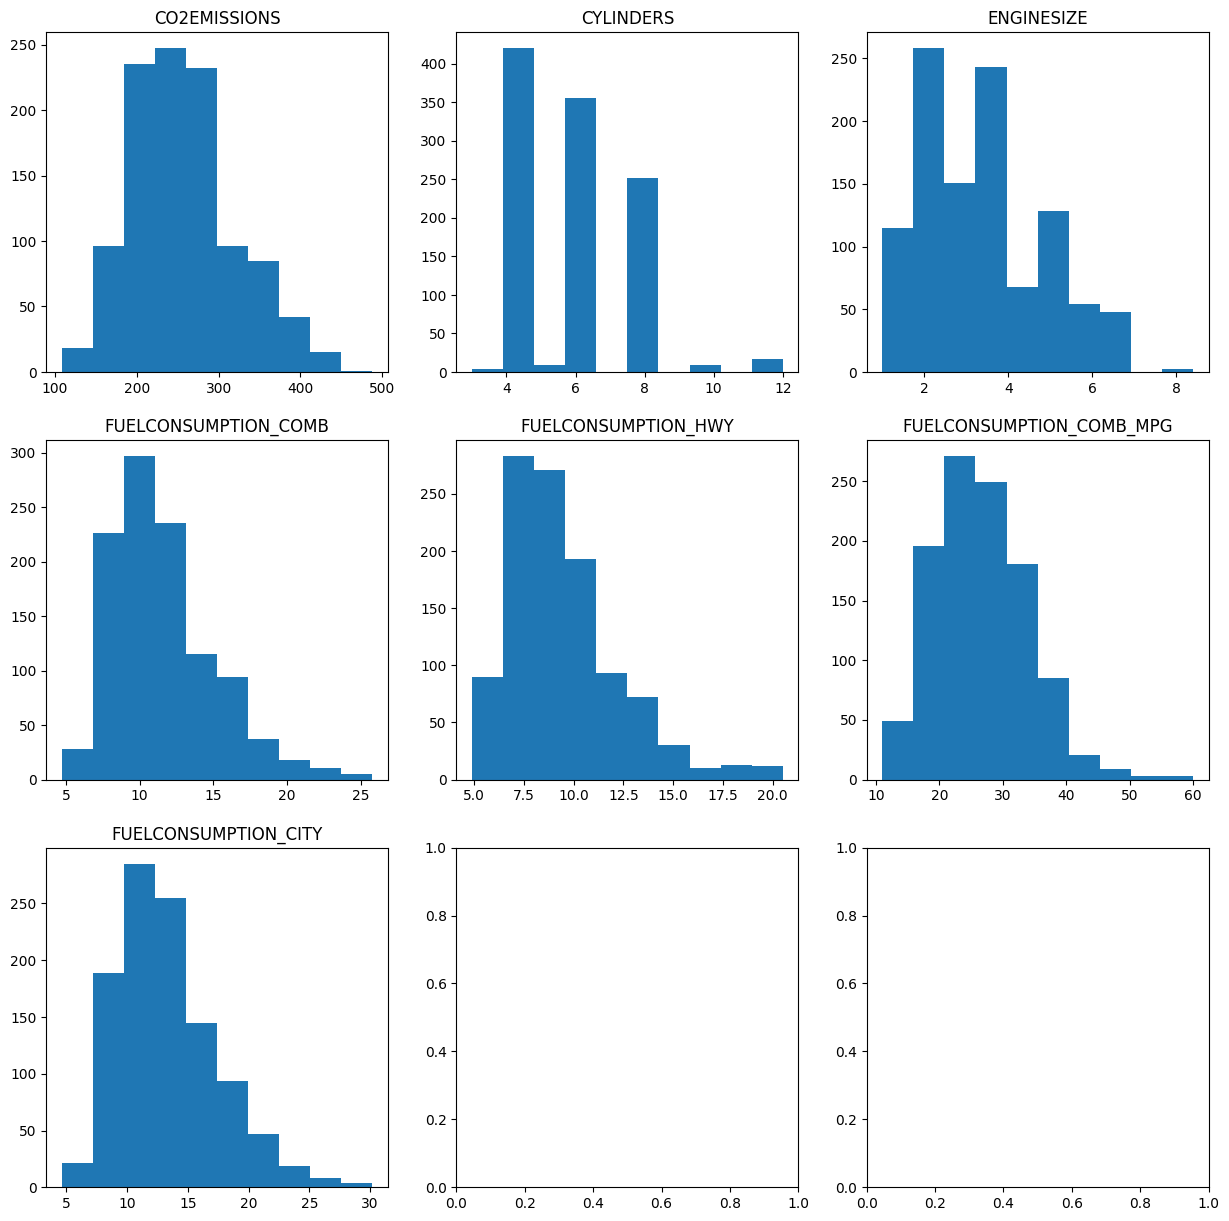

In [56]:
fig, axs = plt.subplots(3,3 ,figsize=(15,15))
axs[0,0].hist(df['CO2EMISSIONS'])
axs[0,0].set_title('CO2EMISSIONS')

axs[0,1].hist(df['CYLINDERS'])
axs[0,1].set_title('CYLINDERS')


axs[0,2].hist(df['ENGINESIZE'])
axs[0,2].set_title('ENGINESIZE')


axs[1,0].hist(df['FUELCONSUMPTION_COMB'])
axs[1,0].set_title('FUELCONSUMPTION_COMB')


axs[1,1].hist(df['FUELCONSUMPTION_HWY'])
axs[1,1].set_title('FUELCONSUMPTION_HWY')

axs[1,2].hist(df['FUELCONSUMPTION_COMB_MPG'])
axs[1,2].set_title('FUELCONSUMPTION_COMB_MPG')


axs[2,0].hist(df['FUELCONSUMPTION_CITY'])
axs[2,0].set_title('FUELCONSUMPTION_CITY')



# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 7 X features with CO2EMISSIONS.

Text(0.5, 0.98, 'Y axis is CO2EMISSIONS')

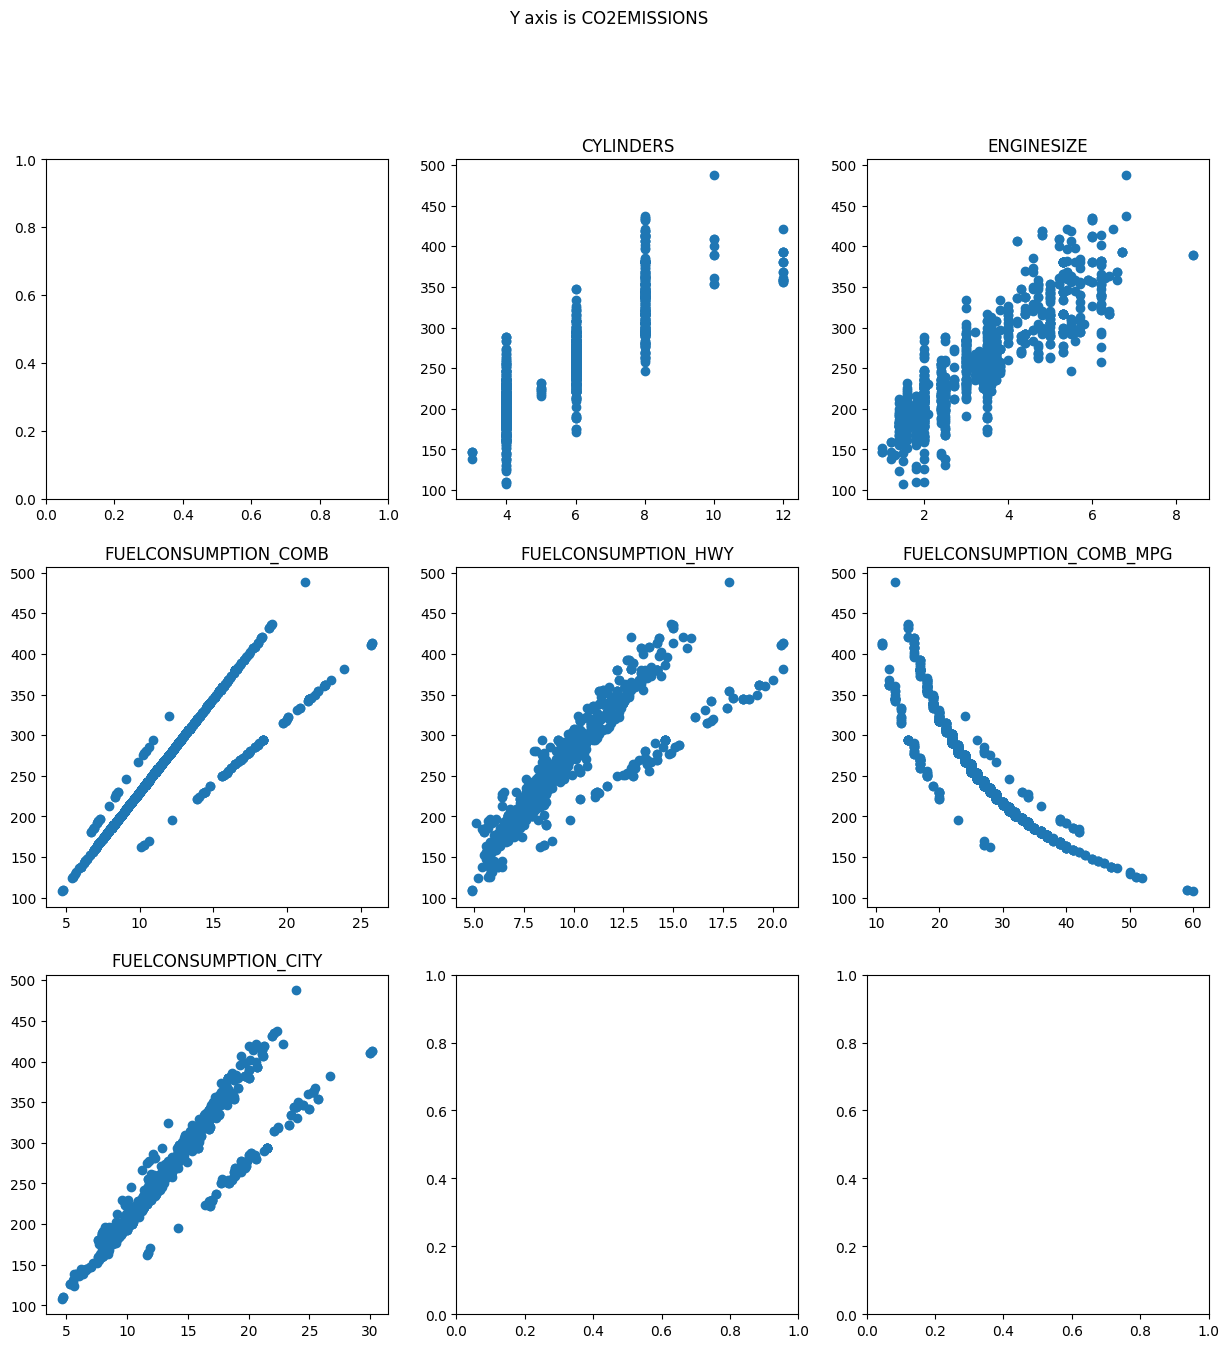

In [57]:
fig, axs = plt.subplots(3,3 ,figsize=(15,15))

axs[0,1].scatter(df['CYLINDERS'],df['CO2EMISSIONS'])
axs[0,1].set_title('CYLINDERS')


axs[0,2].scatter(df['ENGINESIZE'],df['CO2EMISSIONS'])
axs[0,2].set_title('ENGINESIZE')


axs[1,0].scatter(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'])
axs[1,0].set_title('FUELCONSUMPTION_COMB')


axs[1,1].scatter(df['FUELCONSUMPTION_HWY'],df['CO2EMISSIONS'])
axs[1,1].set_title('FUELCONSUMPTION_HWY')

axs[1,2].scatter(df['FUELCONSUMPTION_COMB_MPG'],df['CO2EMISSIONS'])
axs[1,2].set_title('FUELCONSUMPTION_COMB_MPG')


axs[2,0].scatter(df['FUELCONSUMPTION_CITY'],df['CO2EMISSIONS'])
axs[2,0].set_title('FUELCONSUMPTION_CITY')

plt.suptitle('Y axis is CO2EMISSIONS')

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

Text(0.5, 1.0, 'FUELCONSUMPTION_CITY')

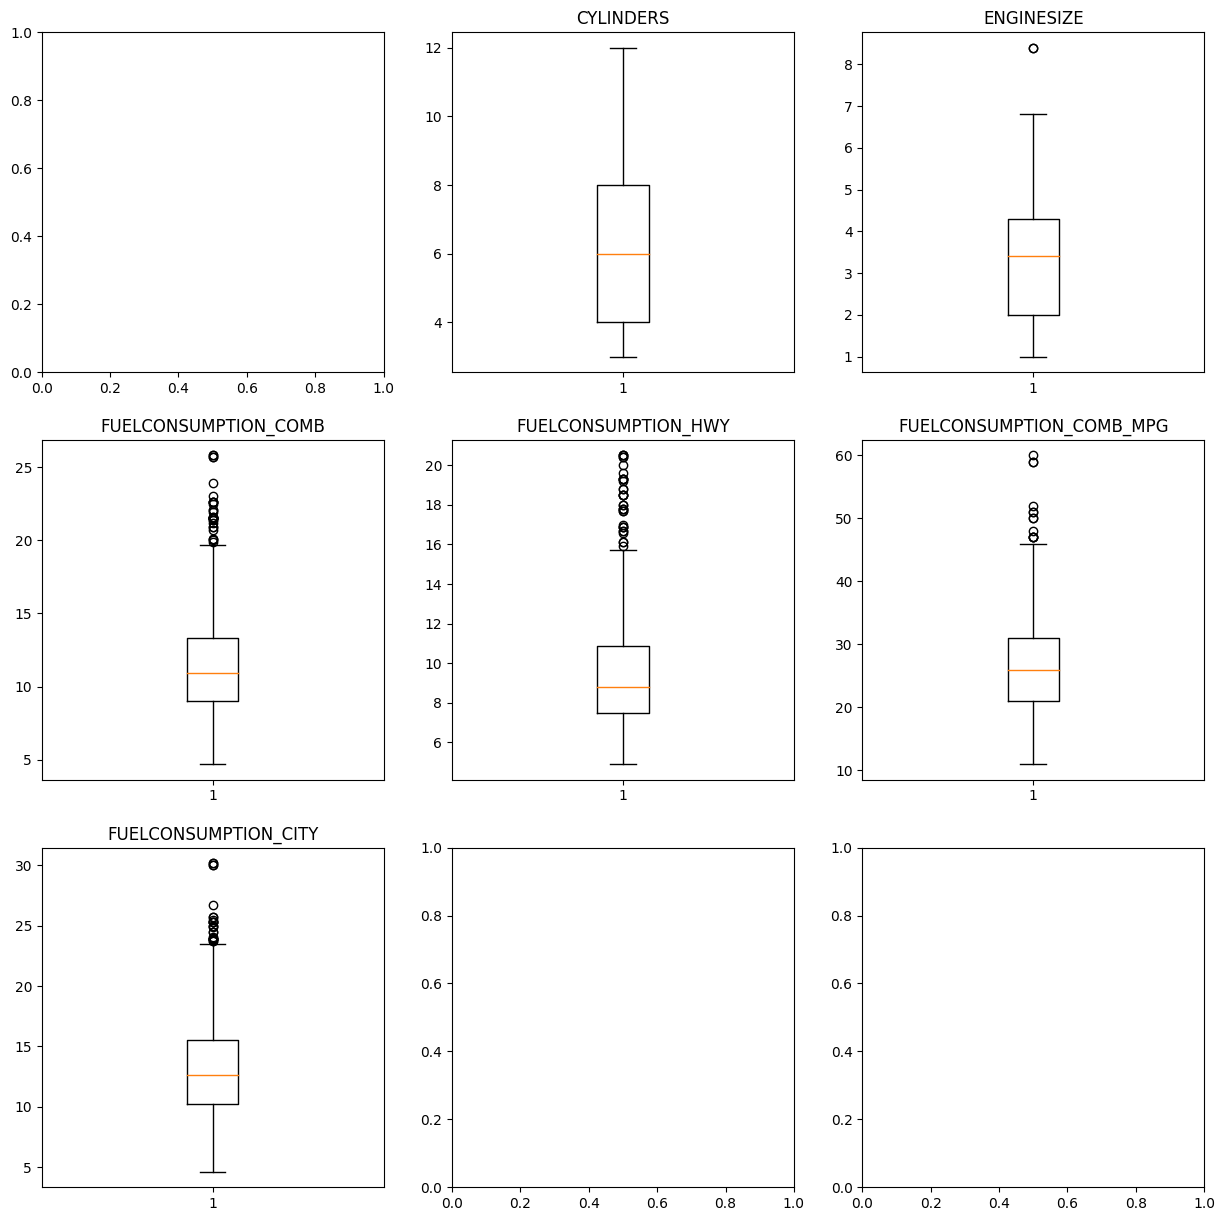

In [58]:
fig, axs = plt.subplots(3,3 ,figsize=(15,15))

axs[0,1].boxplot(df['CYLINDERS'])
axs[0,1].set_title('CYLINDERS')


axs[0,2].boxplot(df['ENGINESIZE'])
axs[0,2].set_title('ENGINESIZE')


axs[1,0].boxplot(df['FUELCONSUMPTION_COMB'])
axs[1,0].set_title('FUELCONSUMPTION_COMB')


axs[1,1].boxplot(df['FUELCONSUMPTION_HWY'])
axs[1,1].set_title('FUELCONSUMPTION_HWY')

axs[1,2].boxplot(df['FUELCONSUMPTION_COMB_MPG'])
axs[1,2].set_title('FUELCONSUMPTION_COMB_MPG')


axs[2,0].boxplot(df['FUELCONSUMPTION_CITY'])
axs[2,0].set_title('FUELCONSUMPTION_CITY')



# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [59]:
def limits(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    print("Upper Bound:",upper)   
    print("Lower Bound:",lower)
    return upper, lower
    

CYLINDERS_upper, CYLINDERS_lower = limits(df['CYLINDERS'])
print("--------------------")
ENGINESIZE_upper, ENGINESIZE_lower = limits(df['ENGINESIZE'])
print("--------------------")
FUELCONSUMPTION_COMB_upper, FUELCONSUMPTION_COMB_lower = limits(df['FUELCONSUMPTION_COMB'])
print("--------------------")
FUELCONSUMPTION_CITY_upper, FUELCONSUMPTION_CITY_lower = limits(df['FUELCONSUMPTION_CITY'])
print("--------------------")
FUELCONSUMPTION_HWY_upper, FUELCONSUMPTION_HWY_lower = limits(df['FUELCONSUMPTION_HWY'])
print("--------------------")
FUELCONSUMPTION_COMB_MPG_upper, FUELCONSUMPTION_COMB_MPG_lower = limits(df['FUELCONSUMPTION_COMB_MPG'])
print("--------------------")

#droping the outliers the 
outliers = df[(df['CYLINDERS'] < CYLINDERS_lower) | (df['CYLINDERS'] > CYLINDERS_upper)]
df = df.drop(outliers.index)
outliers = df[(df['ENGINESIZE'] < ENGINESIZE_lower) | (df['ENGINESIZE'] > ENGINESIZE_upper)]
df = df.drop(outliers.index)
outliers = df[(df['FUELCONSUMPTION_COMB'] < FUELCONSUMPTION_COMB_lower) | (df['FUELCONSUMPTION_COMB'] > FUELCONSUMPTION_COMB_upper)]
df = df.drop(outliers.index)
outliers = df[(df['FUELCONSUMPTION_CITY'] < FUELCONSUMPTION_CITY_lower) | (df['FUELCONSUMPTION_CITY'] > FUELCONSUMPTION_CITY_upper)]
df = df.drop(outliers.index)
outliers = df[(df['FUELCONSUMPTION_HWY'] < FUELCONSUMPTION_HWY_lower) | (df['FUELCONSUMPTION_HWY'] > FUELCONSUMPTION_HWY_upper)]
df = df.drop(outliers.index)
outliers = df[(df['FUELCONSUMPTION_COMB_MPG'] < FUELCONSUMPTION_COMB_MPG_lower) | (df['FUELCONSUMPTION_COMB_MPG'] > FUELCONSUMPTION_COMB_MPG_upper)]
df = df.drop(outliers.index)




Upper Bound: 14.0
Lower Bound: -2.0
--------------------
Upper Bound: 7.75
Lower Bound: -1.4499999999999997
--------------------
Upper Bound: 19.875000000000004
Lower Bound: 2.474999999999998
--------------------
Upper Bound: 23.5
Lower Bound: 2.299999999999999
--------------------
Upper Bound: 15.875000000000004
Lower Bound: 2.474999999999998
--------------------
Upper Bound: 46.0
Lower Bound: 6.0
--------------------


Text(0.5, 1.0, 'FUELCONSUMPTION_CITY')

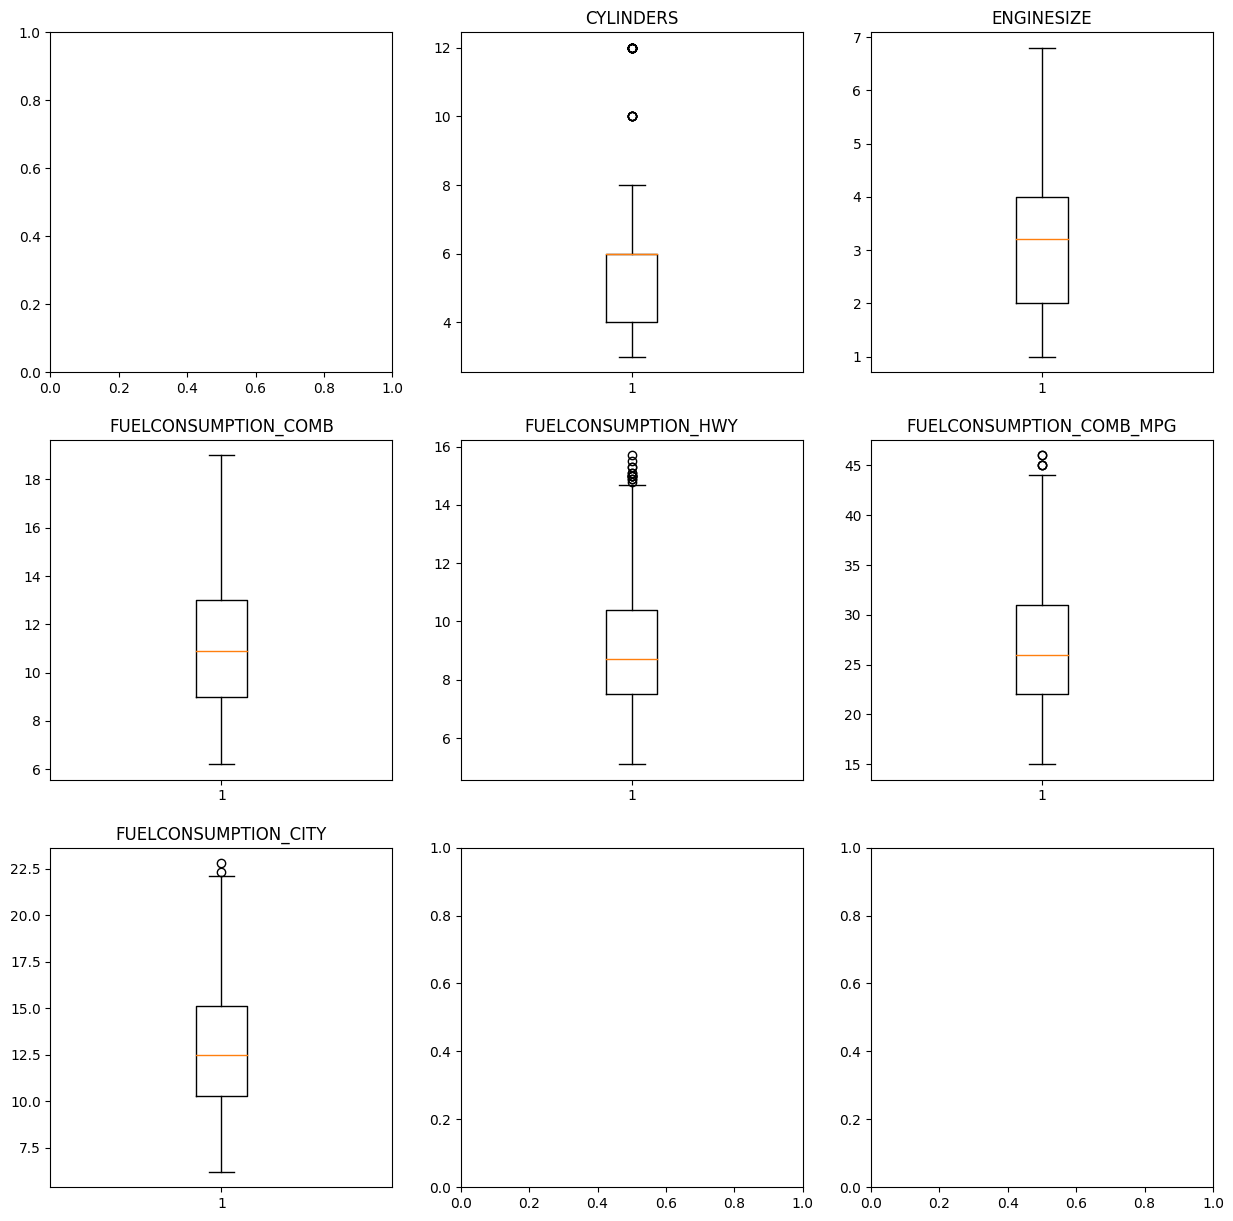

In [60]:
fig, axs = plt.subplots(3,3 ,figsize=(15,15))

axs[0,1].boxplot(df['CYLINDERS'])
axs[0,1].set_title('CYLINDERS')


axs[0,2].boxplot(df['ENGINESIZE'])
axs[0,2].set_title('ENGINESIZE')


axs[1,0].boxplot(df['FUELCONSUMPTION_COMB'])
axs[1,0].set_title('FUELCONSUMPTION_COMB')


axs[1,1].boxplot(df['FUELCONSUMPTION_HWY'])
axs[1,1].set_title('FUELCONSUMPTION_HWY')

axs[1,2].boxplot(df['FUELCONSUMPTION_COMB_MPG'])
axs[1,2].set_title('FUELCONSUMPTION_COMB_MPG')


axs[2,0].boxplot(df['FUELCONSUMPTION_CITY'])
axs[2,0].set_title('FUELCONSUMPTION_CITY')



# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [61]:
from sklearn.model_selection import train_test_split
X = df.drop('CO2EMISSIONS', axis=1)
y=df['CO2EMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42  ) 

print('Training set shape: ',X_train.shape,y_train.shape)
print('Testing set shape: ',X_test.shape,y_test.shape)




Training set shape:  (813, 6) (813,)
Testing set shape:  (204, 6) (204,)


# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [62]:
LR = LinearRegression()
fit = LR.fit(X_train['ENGINESIZE'].to_numpy().reshape(-1,1), y_train)


coefficients = LR.coef_
intercept = LR.intercept_
print(f'coefficients is {coefficients} and the intercept is:  {intercept}')



coefficients is [37.59225521] and the intercept is:  130.46261014629943


# Exercise 5 : Plot the Output

Plot linear regression model (output).

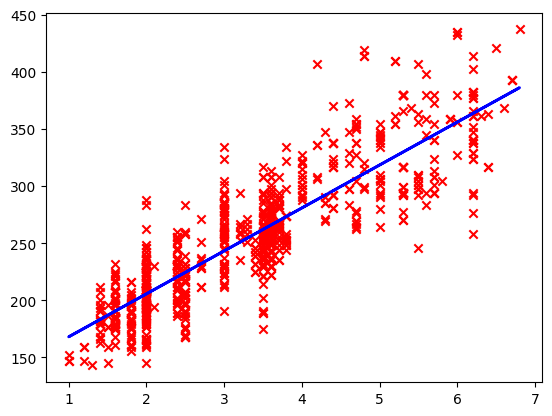

In [63]:
plt.scatter(X_train['ENGINESIZE'].to_numpy().reshape(-1,1), y_train, color='r',marker='x', label='Training Data')
plt.plot(X_train['ENGINESIZE'].to_numpy().reshape(-1,1), LR.predict(X_train['ENGINESIZE'].to_numpy().reshape(-1,1)), color='b', linewidth=2, label='Linear Regression')


# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = LR.predict(X_test['ENGINESIZE'].to_numpy().reshape(-1,1))
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mea = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('mse=',mse,'rmse=',rmse,'mea=',mea,'r2=',r2)

mse= 1008.6376815121449 rmse= 31.75905668485991 mea= 23.22202365675435 r2= 0.7467422209723518


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label.